In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [2]:
# Load the TSV file, using header=None since there is no header row
df_train = pd.read_csv('Chinatown_TRAIN.tsv', sep='\t', header=None)
df_test = pd.read_csv('Chinatown_TEST.tsv', sep='\t', header=None)

In [3]:
#  Separate labels and data of train 
labels_train = df_train.iloc[:, 0].values        
data_train = df_train.iloc[:, 1:]     
print("train Labels shape:", labels_train.shape)
print("train Data shape: ", data_train.shape)

train Labels shape: (20,)
train Data shape:  (20, 24)


In [4]:
#  Separate labels and data of test 
labels_test = df_test.iloc[:, 0].values        
data_test = df_test.iloc[:, 1:]     
print("test Labels shape:", labels_test.shape)
print("test Data shape: ", data_test.shape)

test Labels shape: (343,)
test Data shape:  (343, 24)


In [5]:
#  Verify there are no missing values
print("\nAny missing values in the train dataset?", data_train.isnull().any().any())
print("\nAny missing values in the test dataset?", data_test.isnull().any().any())


Any missing values in the train dataset? False

Any missing values in the test dataset? False


In [6]:
print(data_train.head())
print(data_test.head())

    1    2    3    4    5   6   7   8    9    10  ...    15    16    17    18  \
0  573  375  301  212   55  34  25  33  113  143  ...  1221  1081   866  1096   
1  394  264  140  144  104  28  28  25   70  153  ...  1249  1240  1109  1137   
2  603  348  176  177   47  30  40  42  101  180  ...  1408  1243  1141  1178   
3  428  309  199  117   82  43  24  64  152  183  ...  1523  1460  1365  1520   
4  372  310  203  133   65  39  27  36  107  139  ...  1041   971  1104   844   

     19    20    21    22   23   24  
0  1039   975   746   581  409  182  
1  1290  1137   791   638  597  316  
2  1256  1114   814   635  304  168  
3  1700  1797  1596  1139  910  640  
4  1023  1019   862   643  591  452  

[5 rows x 24 columns]
    1    2    3    4    5    6   7    8    9    10  ...    15    16    17  \
0  501  328  195  218   67   17  28   72  132  215  ...  1234  1238  1107   
1  880  752  913  863  402  112  60  112  119  186  ...  1040  1063  1009   
2  493  389  174  121   82   36

Plotting sample idx = 10
Plotting sample idx = 11
Plotting sample idx = 12
Plotting sample idx = 13
Plotting sample idx = 14


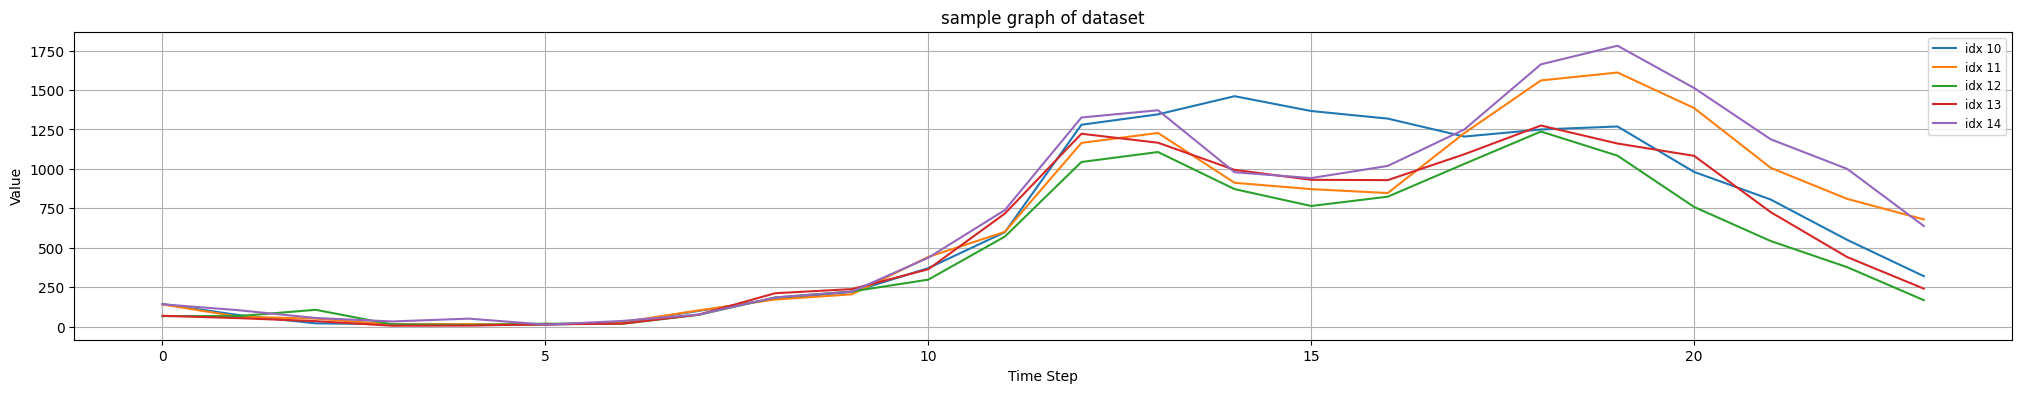

In [7]:
plt.figure(figsize=(25, 4))
count = 0
for i in range(len(labels_train)):
    if labels_train[i] == 2:
        print(f"Plotting sample idx = {i}")
        plt.plot(data_train.iloc[i].values,label=f"idx {i}")
        count += 1
        if count == 5:
            break
plt.title("sample graph of dataset")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend(loc="upper right", fontsize="small")
plt.grid(True)
plt.show()

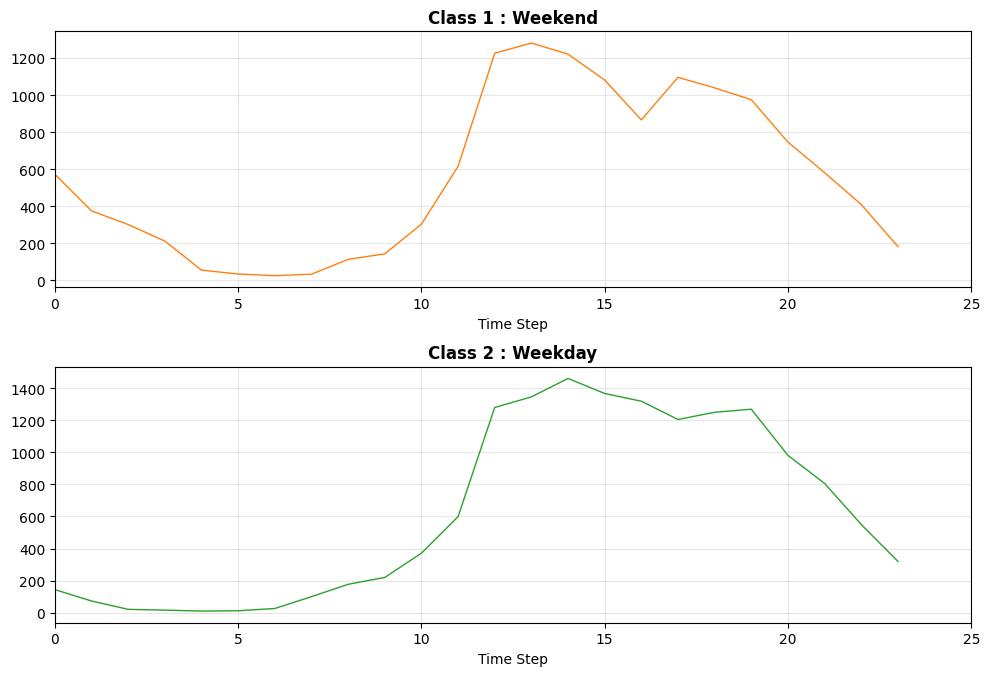

In [8]:
# Map numeric labels to human-readable names
class_names = {
    1: "Weekend",
    2: "Weekday"
}

colors = plt.cm.tab10.colors
ticks = np.arange(0, 26, 5)

fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=False)

for cls, ax in zip(range(3), axes):
    # find the first example of this class
    idxs = np.where(labels_train == cls)[0]
    if len(idxs) == 0:
        ax.set_visible(False)
        continue
    idx = idxs[0]
    series = data_train.iloc[idx].values

    # plot
    ax.plot(series, color=colors[cls], linewidth=1)

    # X-axis ticks and labels on every subplot
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks)
    ax.set_xlim(0, 25)


    # Title centered
    ax.set_title(f"Class {cls} : {class_names[cls]}", fontsize=12, fontweight="bold")
    ax.grid(True, alpha=0.3)

# Add a shared X label underneath all subplots
for ax in axes:
    ax.set_xlabel("Time Step")

plt.tight_layout(h_pad=1.0)
plt.savefig("Chinatown_graph.pdf", bbox_inches='tight')
plt.show()

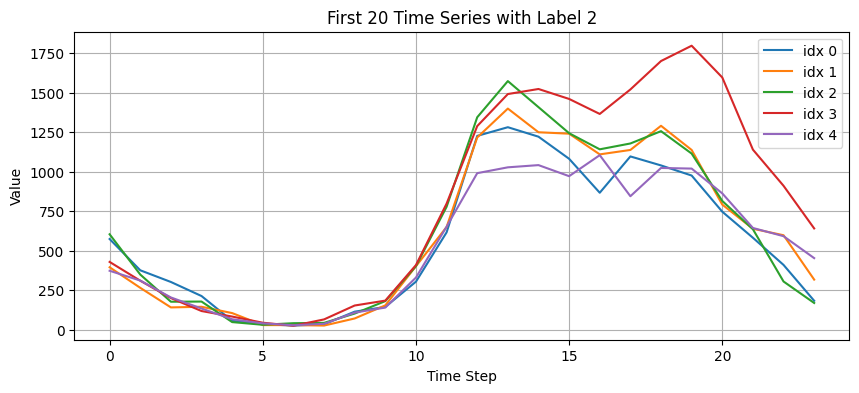

In [9]:
plt.figure(figsize=(10, 4))
count = 0
for i in range(len(labels_train)):
    if labels_train[i] == 1:
        plt.plot(data_train.iloc[i].values, label=f"idx {i}")
        count += 1
        if count == 5:
            break
plt.title("First 20 Time Series with Label 2")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()